In [6]:
pip install faker

   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
    --------------------------------------- 0.0/1.9 MB 259.2 kB/s eta 0:00:08
    --------------------------------------- 0.0/1.9 MB 245.8 kB/s eta 0:00:08
   - -------------------------------------- 0.1/1.9 MB 391.3 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.9 MB 514.3 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.9 MB 846.9 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/1.9 MB 850.6 kB/s eta 0:00:02
   ---------- ----------------------------- 0.5/1.9 MB 1.4 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.9 MB 1.4 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.9 MB 1.8 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/1.9 MB 2.1 MB/s eta 0:00:01
   ------------------

In [8]:
import pandas as pd
import numpy as np
from faker import Faker
import random

In [10]:
fake = Faker()

Generate Basic Case Data

In [13]:
data = []
num_cases = 100

In [19]:
for i in range(1, num_cases + 1):
    case_id = 1
    customer_name = fake.name()
    #Generate accident date within the last 180 days
    accident_date = fake.date_between(start_date="-180d", end_date = "-10d")

    #Request date is 0 - 3 days after the accident
    request_date = accident_date + pd.Timedelta(days=random.randint(0, 3))

    #Delivery delay is 0 to 72 hours
    delay_hours = random.randint(1, 72)
    delivery_date = request_date + pd.Timedelta(hours=delay_hours)

    #Random rental company and car brand
    rental_company = random.choice(["Sixt", "Enterprise","Avis", "Grenta","Zeplin"])
    car_brand = random.choice(['Renault', 'Fiat', 'Volkswagen', 'Toyota', 'Hyundai'])

    #Rental duration: 2 to 30 days
    rental_duration = random.randint(2,30)

    #Did the customer complain? 20% chance yes
    complaint = random.random() < 0.2
    complaint_reason = random.choice(["delay","dirty car","no GPS"]) if complaint else None

    # Append all to data list
    data.append([
        case_id,
        customer_name,
        accident_date,
        request_date,
        delivery_date,
        rental_company,
        car_brand,
        complaint,
        complaint_reason,
        rental_duration,
        delay_hours
    ])
    

Create DataFrame

In [22]:
columns = [
    'case_id',
    'customer_name',
    'accident_date',
    'request_date',
    'delivery_date',
    'rental_company',
    'car_brand',
    'complaint_made',
    'complaint_reason',
    'rental_duration_days',
    'delivery_delay_hours'
]

df = pd.DataFrame(data, columns=columns)

In [24]:
print(df.head())

   case_id    customer_name accident_date request_date delivery_date  \
0        1     Thomas Parks    2025-02-26   2025-02-26    2025-02-27   
1        1    Kristen Grant    2025-04-25   2025-04-28    2025-04-28   
2        1   Amanda Gilmore    2025-05-09   2025-05-11    2025-05-12   
3        1   Michael Harris    2025-01-13   2025-01-13    2025-01-15   
4        1  Jeffrey Stanley    2025-01-04   2025-01-04    2025-01-04   

  rental_company car_brand  complaint_made complaint_reason  \
0           Sixt      Fiat           False             None   
1     Enterprise      Fiat           False             None   
2           Avis    Toyota           False             None   
3           Sixt   Renault           False             None   
4           Avis    Toyota           False             None   

   rental_duration_days  delivery_delay_hours  
0                    27                    47  
1                     3                     1  
2                    20                    4

 Exploratory Data Analysis

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Average Delivery Delay

In [31]:
print("Average delivery delay (hours: ", df["delivery_delay_hours"].mean())

Average delivery delay (hours:  37.49


Complaints by Rental Company

In [36]:
complaints_by_company = df[df['complaint_made']].groupby('rental_company').size()
print(complaints_by_company)

rental_company
Avis          2
Enterprise    4
Grenta        3
Sixt          7
Zeplin        2
dtype: int64


Plot Complaint Count per Rental Company

C:\Users\mehme\AppData\Local\Temp\ipykernel_13136\1018630654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['complaint_made']], x='rental_company', palette='Reds')


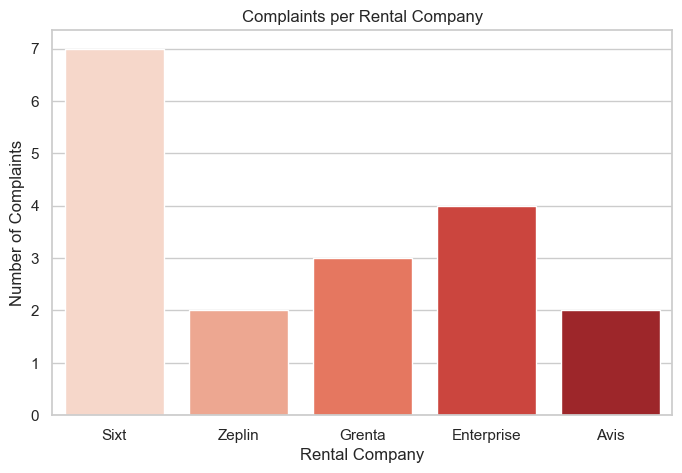

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(data=df[df['complaint_made']], x='rental_company', palette='Reds')
plt.title('Complaints per Rental Company')
plt.ylabel('Number of Complaints')
plt.xlabel('Rental Company')
plt.show()

Distribution of Delivery Delays

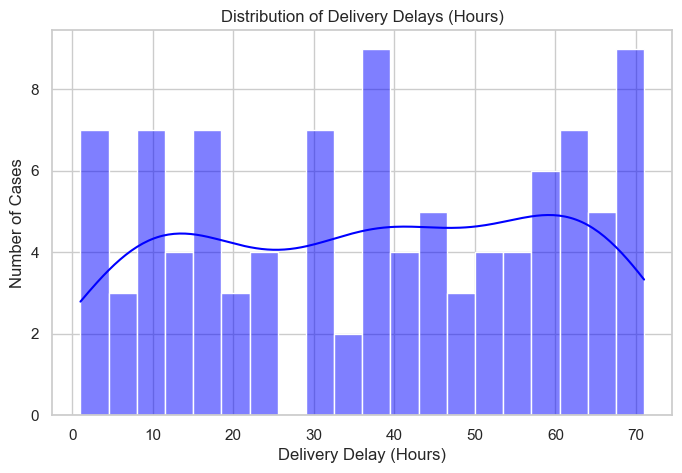

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df['delivery_delay_hours'], bins=20, kde=True, color='blue')
plt.title('Distribution of Delivery Delays (Hours)')
plt.xlabel('Delivery Delay (Hours)')
plt.ylabel('Number of Cases')
plt.show()

Complaint Reasons Pie Chart

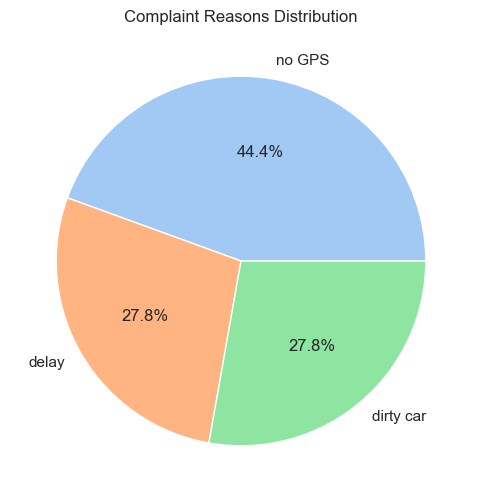

In [46]:
plt.figure(figsize=(6,6))
df['complaint_reason'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Complaint Reasons Distribution')
plt.ylabel('')
plt.show()

Average Rental Duration per Car Brand

C:\Users\mehme\AppData\Local\Temp\ipykernel_13136\1398024603.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration_by_brand.index, y=avg_duration_by_brand.values, palette='Blues')


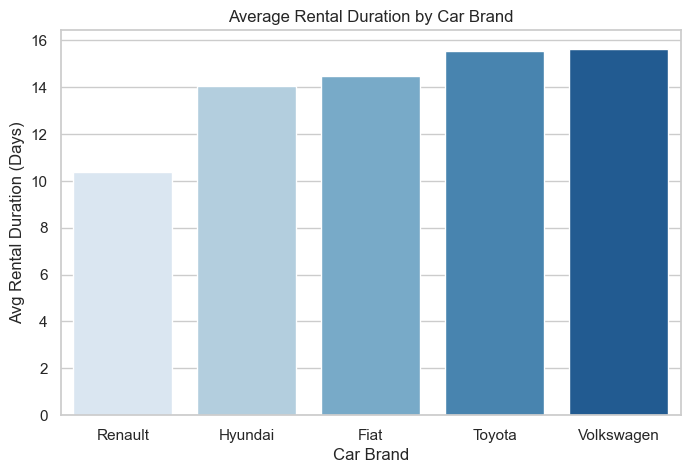

In [51]:
avg_duration_by_brand = df.groupby('car_brand')['rental_duration_days'].mean().sort_values()



plt.figure(figsize=(8,5))
sns.barplot(x=avg_duration_by_brand.index, y=avg_duration_by_brand.values, palette='Blues')
plt.title('Average Rental Duration by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Avg Rental Duration (Days)')
plt.show()

In [53]:
#Save Dataset
df.to_csv("replacement_car_cases.csv", index=False)